In [4]:
# Khuyến nghị: học viên nên sử dụng Google Colab
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn import svm

# Load dữ liệu
bank = pd.read_csv("https://raw.githubusercontent.com/ltdaovn/dataset/master/bank/bank-full.csv", sep=";", na_values="unknown")

# Kiểm tra dữ liệu
print(bank.head())
print(bank.shape)
print(bank.columns)

# Chuyển đổi dữ liệu thành dạng số
bank["default"] = bank["default"].map({"no": 0, "yes": 1})
bank["housing"] = bank["housing"].map({"no": 0, "yes": 1})
bank["loan"] = bank["loan"].map({"no": 0, "yes": 1})
bank["y"] = bank["y"].map({"no": 0, "yes": 1})
bank["education"] = bank["education"].map({"primary": 0, "secondary": 1, "tertiary": 2})
bank["month"] = pd.to_datetime(bank["month"], format="%b").dt.month

# Xử lý các giá trị thiếu và loại bỏ cột không cần thiết
bank.drop(["poutcome", "contact"], axis=1, inplace=True)
bank.dropna(inplace=True)

# Tạo các biến giả cho các cột phân loại
bank = pd.get_dummies(bank, drop_first=True)

# Phân chia dữ liệu
X = bank.drop("y", axis=1)
y = bank["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Kiểm tra số lượng lớp trong tập huấn luyện
print(y_train.value_counts())

# Huấn luyện mô hình SVM không xử lý mất cân bằng
model = svm.SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Đánh giá mô hình
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

# Sử dụng kỹ thuật SMOTE để xử lý mất cân bằng
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)
print("Số lượng lớp sau SMOTE:", np.bincount(y_train))

# Huấn luyện và đánh giá mô hình SVM với SMOTE
model = svm.SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Confusion Matrix with SMOTE:\n", confusion_matrix(y_test, y_pred))
print("Accuracy with SMOTE:", accuracy_score(y_test, y_pred))
print("Recall with SMOTE:", recall_score(y_test, y_pred))

# Sử dụng kỹ thuật NearMiss để xử lý mất cân bằng
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
nr = NearMiss()
X_train, y_train = nr.fit_resample(X_train, y_train)
print("Số lượng lớp sau NearMiss:", np.bincount(y_train))

# Huấn luyện và đánh giá mô hình SVM với NearMiss
model = svm.SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Confusion Matrix with NearMiss:\n", confusion_matrix(y_test, y_pred))
print("Accuracy with NearMiss:", accuracy_score(y_test, y_pred))


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day month  duration  campaign  pdays  previous poutcome   y  
0     NaN    5   may       261         1     -1         0      NaN  no  
1     NaN    5   may       151         1     -1         0      NaN  no  
2     NaN    5   may        76         1     -1         0      NaN  no  
3     NaN    5   may        92         1     -1         0      NaN  no  
4     NaN    5   may       198         1     -1         0      NaN  no  
(45211, 17)
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', '

a)Tập dữ liệu có: 45,211 hàng và 17 cột.

b)Tập dữ liệu có 45,211 khách hàng.
Số khách hàng đăng ký dịch vụ (subscribed): 3,766.
Số khách hàng không đăng ký dịch vụ (not subscribed): 28,628.

c)job: 288 dữ liệu rỗng
education: 1,186 dữ liệu rỗng
contact: 12,921 dữ liệu rỗng
poutcome: 31,604 dữ liệu rỗng

d)Dữ liệu không cân bằng là dữ liệu có sự khác biệt lớn trong số lượng của các lớp (ví dụ, một lớp có nhiều mẫu hơn lớp còn lại). Điều này thường khiến mô hình học không tốt với lớp ít mẫu.

Các phương pháp cân bằng dữ liệu:

SMOTE (Synthetic Minority Over-sampling Technique): Tạo các mẫu dữ liệu giả bằng cách nội suy giữa các mẫu thiểu số gần nhau. SMOTE giúp tăng số lượng mẫu trong lớp thiểu số để cân bằng.
NearMiss: Loại bỏ bớt các mẫu từ lớp đa số. NearMiss chọn các mẫu đa số gần nhất với các mẫu thiểu số để cân bằng số lượng mẫu giữa các lớp.
Random Over-sampling: Nhân đôi ngẫu nhiên các mẫu thiểu số cho đến khi cân bằng.
Random Under-sampling: Loại bỏ ngẫu nhiên các mẫu từ lớp đa số để đạt cân bằng.

e)
subscribed	28,628	3,766
not subscribed	28,628	3,766

f)

Phương pháp	         Accuracy	Recall

Dữ liệu mất cân bằng	88.4%	  0.88%

SMOTE	                78.1%	  70.3%

NearMiss	            55.5%	  83.1%


In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

# Tải dữ liệu
data = pd.read_csv("/content/drive/My Drive/B2106842_lab5_viz/creditcard.csv")

# Kiểm tra tổng quan dữ liệu
print(data.info())
print(data.head())
print(data.describe())



Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-nul

Class
0    284315
1       492
Name: count, dtype: int64


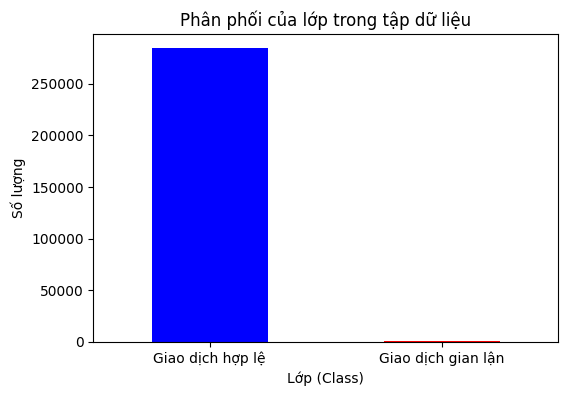

In [2]:
import matplotlib.pyplot as plt

# Phân phối của cột class
class_distribution = data["Class"].value_counts()
print(class_distribution)

# Hiển thị biểu đồ phân phối
plt.figure(figsize=(6,4))
class_distribution.plot(kind='bar', color=['blue', 'red'])
plt.title("Phân phối của lớp trong tập dữ liệu")
plt.xlabel("Lớp (Class)")
plt.ylabel("Số lượng")
plt.xticks([0, 1], ["Giao dịch hợp lệ", "Giao dịch gian lận"], rotation=0)
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Phân chia dữ liệu
X = data.drop("Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Huấn luyện mô hình
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))


Confusion Matrix:
 [[85293    14]
 [   51    85]]
Accuracy: 0.9992392589211521
Recall: 0.625


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
from imblearn.over_sampling import SMOTE

# Áp dụng SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Huấn luyện lại mô hình với dữ liệu đã cân bằng
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_res, y_res)

# Dự đoán và đánh giá
y_pred_smote = model_smote.predict(X_test)
print("Confusion Matrix with SMOTE:\n", confusion_matrix(y_test, y_pred_smote))
print("Accuracy with SMOTE:", accuracy_score(y_test, y_pred_smote))
print("Recall with SMOTE:", recall_score(y_test, y_pred_smote))


Confusion Matrix with SMOTE:
 [[84466   841]
 [   10   126]]
Accuracy with SMOTE: 0.9900401437215454
Recall with SMOTE: 0.9264705882352942


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
